In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import math
import sys
%matplotlib inline
plt.style.use(['ggplot'])

In [2]:
# importing the data
data = pd.read_csv("FoDS-Assignment-2.csv", names = ["X1","X2","X3","X4","X5","X6","X7","X8","X9","X10","X11","X12","X13","Y"], header=0)
data

,X1,X2,X3,X4,X5,X6,X7,X8,X9,X10,X11,X12,X13,Y
0,4,1.75,2120.0,7420,1.0,0,0,4,7,1060.0,1060,1540,7420,453000.0
1,4,2.50,2180.0,9861,2.0,0,2,3,8,2180.0,0,2390,9761,480000.0
2,3,1.50,1540.0,9800,1.0,0,0,3,7,1010.0,530,1600,8250,180500.0
3,3,3.50,2380.0,6250,2.0,0,3,3,8,1670.0,710,2540,4010,495000.0
4,4,2.50,2230.0,8500,2.0,0,0,3,8,2230.0,0,2270,8770,325000.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1183,4,2.50,2623.0,7184,2.0,0,0,3,8,2623.0,0,2010,4939,333000.0
1184,2,2.00,1730.0,4248,2.0,0,0,3,7,1730.0,0,1380,4000,450000.0
1185,4,2.50,3040.0,6425,2.0,0,0,3,8,3040.0,0,3040,7800,776000.0
1186,4,1.50,2150.0,11026,1.0,0,0,4,7,2150.0,0,1760,10283,400000.0


In [3]:
def normalize(data):

    data["X1"] = (data["X1"] - data["X1"].mean())/(data["X1"].std())
    data["X2"] = (data["X2"] - data["X2"].mean())/(data["X2"].std())
    data["X3"] = (data["X3"] - data["X3"].mean())/(data["X3"].std())
    data["X4"] = (data["X4"] - data["X4"].mean())/(data["X4"].std())
    data["X5"] = (data["X5"] - data["X5"].mean())/(data["X5"].std())
    data["X6"] = (data["X6"] - data["X6"].mean())/(data["X6"].std())
    data["X7"] = (data["X7"] - data["X7"].mean())/(data["X7"].std())
    data["X8"] = (data["X8"] - data["X8"].mean())/(data["X8"].std())
    data["X9"] = (data["X9"] - data["X9"].mean())/(data["X9"].std())
    data["X10"] = (data["X10"] - data["X10"].mean())/(data["X10"].std())
    data["X11"] = (data["X11"] - data["X11"].mean())/(data["X11"].std())
    data["X12"] = (data["X12"] - data["X12"].mean())/(data["X12"].std())
    data["X13"] = (data["X13"] - data["X13"].mean())/(data["X13"].std())
    data["Y"] = (data["Y"] - data["Y"].mean())/(data["Y"].std())

In [4]:
def split(data,fraction = 0.7):
    
    shuffled_data = data.sample(frac=1, random_state=0) # Shuffling the dataset
    split_index = int(fraction * len(data)) # Finding split index
    
    # Spliting the dataset 
    train= shuffled_data[:split_index]
    test = shuffled_data[split_index:]
    return train.reset_index(drop=True), test.reset_index(drop=True)

In [5]:
def calculate_cost(W, X, Y):
    
    m = len(Y)
    predictions = X.dot(W)
    cost = np.sum(np.square(predictions - Y)) * (1/(2*m))
    return cost

In [6]:
def gradient_descent(X, Y, W, learning_rate=0.01, iterations=1000):

    cost_history = np.zeros(iterations)
    m = len(Y)
    for it in range(iterations):
        
        prediction = np.dot(X, W)        
        W = W - np.multiply((X.T.dot((prediction - Y))), learning_rate/m)
        cost_history[it]  = calculate_cost(W, X, Y)
        
    return W, cost_history

In [7]:
def errorloop(cost_history):

    for it in range(len(cost_history)):
        
        if it%500==0: print(cost_history[it])

In [8]:
def model(X, Y, learning_rate, iterations):

    train_X_terms = X
    W_gd = np.zeros(train_X_terms.shape[1])
    W_gd, cost_history_gd = gradient_descent(train_X_terms, Y, W_gd, learning_rate, iterations)
    
    # print(W_gd)
    # print('Final cost/MSE:',cost_history_gd[-1])
    # print('-------------------------------------------------------------------')
    # errorloop(cost_history_gd)
    
    return train_X_terms, W_gd, cost_history_gd, iterations

In [9]:
normalize(data)
train_data, test_data = split(data)

In [10]:
print(train_data.to_string())

           X1        X2        X3         X4        X5         X6        X7        X8        X9       X10       X11       X12       X13         Y
0   -0.411804 -0.504189  1.323625   0.495307 -0.947100  -0.058099 -0.320016 -0.646956 -0.585225  0.272308  2.287366  0.438266  0.287365 -0.551164
1   -0.411804  0.457764  0.265010  -0.174588  0.910734  -0.058099 -0.320016 -0.646956  1.116727  0.656244 -0.665835  0.948419 -0.253548  0.258685
2    0.663412  0.457764  0.285767  -0.100174 -0.947100  -0.058099 -0.320016 -0.646956  0.265751 -0.681715  1.893606  0.598600 -0.273129 -0.135959
3   -0.411804  0.457764 -0.357705  -0.210848  0.910734  -0.058099 -0.320016 -0.646956  0.265751 -0.332682 -0.118946 -0.931861 -0.404698 -0.283895
4   -0.411804  1.419718  1.250975  -0.011410  1.839651  -0.058099 -0.320016 -0.646956  1.116727  1.761516 -0.665835  3.382580  0.265332  1.031687
5   -2.562237 -1.466142 -1.073826   0.262556 -0.947100  -0.058099 -0.320016  0.871984 -1.436201 -0.844597 -0.665835 -0.21764

In [11]:
print(test_data.to_string())

           X1        X2        X3         X4        X5        X6        X7        X8        X9       X10       X11       X12        X13          Y
0    0.663412 -0.504189 -0.544519  -0.152515 -0.947100 -0.058099 -0.320016 -0.646956  0.265751 -0.798060  0.362317 -1.354559  -0.241881  -0.148964
1    0.663412  0.457764 -0.191647  -0.204014  0.910734 -0.058099 -0.320016 -0.646956  0.265751  0.144329 -0.665835 -0.173918  -0.360036  -0.447370
2   -0.411804 -1.466142 -0.108619  -0.124660 -0.947100 -0.058099 -0.320016 -0.646956 -0.585225 -0.751522  1.193588 -0.786103  -0.195808  -0.265732
3   -0.411804  0.457764 -0.887012  -0.235060  2.768567 -0.058099 -0.320016 -0.646956 -0.585225 -0.635178 -0.665835 -1.092195  -0.422755  -0.675716
4   -0.411804 -0.183538 -0.419976   1.818157 -0.947100 -0.058099 -0.320016 -0.646956 -0.585225 -0.111628 -0.665835  0.496569   3.648251  -0.325413
5   -0.411804  0.457764 -0.565276  -0.211059  0.910734 -0.058099 -0.320016 -0.646956  0.265751 -0.274510 -0.665835 -0.

In [12]:
test_data = test_data.dropna()
train_data = train_data.dropna()

In [13]:
print(train_data.to_string())

           X1        X2        X3         X4        X5         X6        X7        X8        X9       X10       X11       X12       X13         Y
0   -0.411804 -0.504189  1.323625   0.495307 -0.947100  -0.058099 -0.320016 -0.646956 -0.585225  0.272308  2.287366  0.438266  0.287365 -0.551164
1   -0.411804  0.457764  0.265010  -0.174588  0.910734  -0.058099 -0.320016 -0.646956  1.116727  0.656244 -0.665835  0.948419 -0.253548  0.258685
2    0.663412  0.457764  0.285767  -0.100174 -0.947100  -0.058099 -0.320016 -0.646956  0.265751 -0.681715  1.893606  0.598600 -0.273129 -0.135959
3   -0.411804  0.457764 -0.357705  -0.210848  0.910734  -0.058099 -0.320016 -0.646956  0.265751 -0.332682 -0.118946 -0.931861 -0.404698 -0.283895
4   -0.411804  1.419718  1.250975  -0.011410  1.839651  -0.058099 -0.320016 -0.646956  1.116727  1.761516 -0.665835  3.382580  0.265332  1.031687
5   -2.562237 -1.466142 -1.073826   0.262556 -0.947100  -0.058099 -0.320016  0.871984 -1.436201 -0.844597 -0.665835 -0.21764

In [14]:
print(test_data.to_string())

           X1        X2        X3         X4        X5        X6        X7        X8        X9       X10       X11       X12        X13          Y
0    0.663412 -0.504189 -0.544519  -0.152515 -0.947100 -0.058099 -0.320016 -0.646956  0.265751 -0.798060  0.362317 -1.354559  -0.241881  -0.148964
1    0.663412  0.457764 -0.191647  -0.204014  0.910734 -0.058099 -0.320016 -0.646956  0.265751  0.144329 -0.665835 -0.173918  -0.360036  -0.447370
2   -0.411804 -1.466142 -0.108619  -0.124660 -0.947100 -0.058099 -0.320016 -0.646956 -0.585225 -0.751522  1.193588 -0.786103  -0.195808  -0.265732
3   -0.411804  0.457764 -0.887012  -0.235060  2.768567 -0.058099 -0.320016 -0.646956 -0.585225 -0.635178 -0.665835 -1.092195  -0.422755  -0.675716
4   -0.411804 -0.183538 -0.419976   1.818157 -0.947100 -0.058099 -0.320016 -0.646956 -0.585225 -0.111628 -0.665835  0.496569   3.648251  -0.325413
5   -0.411804  0.457764 -0.565276  -0.211059  0.910734 -0.058099 -0.320016 -0.646956  0.265751 -0.274510 -0.665835 -0.

In [15]:
train_data.drop(train_data[abs(train_data['X1']) > 3].index, inplace = True)
train_data.drop(train_data[abs(train_data['X2']) > 3].index, inplace = True)
train_data.drop(train_data[abs(train_data['X3']) > 3].index, inplace = True)
train_data.drop(train_data[abs(train_data['X4']) > 3].index, inplace = True)
train_data.drop(train_data[abs(train_data['X5']) > 3].index, inplace = True)
train_data.drop(train_data[abs(train_data['X6']) > 3].index, inplace = True)
train_data.drop(train_data[abs(train_data['X7']) > 3].index, inplace = True)
train_data.drop(train_data[abs(train_data['X8']) > 3].index, inplace = True)
train_data.drop(train_data[abs(train_data['X9']) > 3].index, inplace = True)
train_data.drop(train_data[abs(train_data['X10']) > 3].index, inplace = True)
train_data.drop(train_data[abs(train_data['X11']) > 3].index, inplace = True)
train_data.drop(train_data[abs(train_data['X12']) > 3].index, inplace = True)
train_data.drop(train_data[abs(train_data['X13']) > 3].index, inplace = True)
#train_data.drop(train_data[abs(train_data['Y']) > 3].index, inplace = True)

test_data.drop(test_data[abs(test_data['X1']) > 3].index, inplace = True)
test_data.drop(test_data[abs(test_data['X2']) > 3].index, inplace = True)
test_data.drop(test_data[abs(test_data['X3']) > 3].index, inplace = True)
test_data.drop(test_data[abs(test_data['X4']) > 3].index, inplace = True)
test_data.drop(test_data[abs(test_data['X5']) > 3].index, inplace = True)
test_data.drop(test_data[abs(test_data['X6']) > 3].index, inplace = True)
test_data.drop(test_data[abs(test_data['X7']) > 3].index, inplace = True)
test_data.drop(test_data[abs(test_data['X8']) > 3].index, inplace = True)
test_data.drop(test_data[abs(test_data['X9']) > 3].index, inplace = True)
test_data.drop(test_data[abs(test_data['X10']) > 3].index, inplace = True)
test_data.drop(test_data[abs(test_data['X11']) > 3].index, inplace = True)
test_data.drop(test_data[abs(test_data['X12']) > 3].index, inplace = True)
test_data.drop(test_data[abs(test_data['X13']) > 3].index, inplace = True)
#test_data.drop(test_data[abs(test_data['Y']) > 3].index, inplace = True)

In [16]:
print(train_data.to_string())

           X1        X2        X3        X4        X5        X6        X7        X8        X9       X10       X11       X12       X13         Y
0   -0.411804 -0.504189  1.323625  0.495307 -0.947100 -0.058099 -0.320016 -0.646956 -0.585225  0.272308  2.287366  0.438266  0.287365 -0.551164
1   -0.411804  0.457764  0.265010 -0.174588  0.910734 -0.058099 -0.320016 -0.646956  1.116727  0.656244 -0.665835  0.948419 -0.253548  0.258685
2    0.663412  0.457764  0.285767 -0.100174 -0.947100 -0.058099 -0.320016 -0.646956  0.265751 -0.681715  1.893606  0.598600 -0.273129 -0.135959
3   -0.411804  0.457764 -0.357705 -0.210848  0.910734 -0.058099 -0.320016 -0.646956  0.265751 -0.332682 -0.118946 -0.931861 -0.404698 -0.283895
5   -2.562237 -1.466142 -1.073826  0.262556 -0.947100 -0.058099 -0.320016  0.871984 -1.436201 -0.844597 -0.665835 -0.217646  0.462815  0.120380
6    0.663412  0.457764  0.399931  0.506028  0.910734 -0.058099 -0.320016 -0.646956  1.116727  0.807492 -0.665835  0.846389  1.104346  0

In [17]:
print(test_data.to_string())

           X1        X2        X3        X4        X5        X6        X7        X8        X9       X10       X11       X12       X13         Y
0    0.663412 -0.504189 -0.544519 -0.152515 -0.947100 -0.058099 -0.320016 -0.646956  0.265751 -0.798060  0.362317 -1.354559 -0.241881 -0.148964
1    0.663412  0.457764 -0.191647 -0.204014  0.910734 -0.058099 -0.320016 -0.646956  0.265751  0.144329 -0.665835 -0.173918 -0.360036 -0.447370
2   -0.411804 -1.466142 -0.108619 -0.124660 -0.947100 -0.058099 -0.320016 -0.646956 -0.585225 -0.751522  1.193588 -0.786103 -0.195808 -0.265732
3   -0.411804  0.457764 -0.887012 -0.235060  2.768567 -0.058099 -0.320016 -0.646956 -0.585225 -0.635178 -0.665835 -1.092195 -0.422755 -0.675716
5   -0.411804  0.457764 -0.565276 -0.211059  0.910734 -0.058099 -0.320016 -0.646956  0.265751 -0.274510 -0.665835 -0.640344 -0.411311 -0.525475
6   -0.411804  0.137113  0.057438 -0.130474  0.910734 -0.058099 -0.320016 -0.646956  1.116727  0.423556 -0.665835  0.409114 -0.160101  0

In [18]:
X1 = np.array(train_data['X1'])
X2 = np.array(train_data['X2'])
X3 = np.array(train_data['X3'])
X4 = np.array(train_data['X4'])
X5 = np.array(train_data['X5'])
X6 = np.array(train_data['X6'])
X7 = np.array(train_data['X7'])
X8 = np.array(train_data['X8'])
X9 = np.array(train_data['X9'])
X10 = np.array(train_data['X10'])
X11 = np.array(train_data['X11'])
X12 = np.array(train_data['X12'])
X13 = np.array(train_data['X13'])
Y = np.array(train_data['Y'])
Xtest1 = np.array(test_data['X1'])
Xtest2 = np.array(test_data['X2'])
Xtest3 = np.array(test_data['X3'])
Xtest4 = np.array(test_data['X4'])
Xtest5 = np.array(test_data['X5'])
Xtest6 = np.array(test_data['X6'])
Xtest7 = np.array(test_data['X7'])
Xtest8 = np.array(test_data['X8'])
Xtest9 = np.array(test_data['X9'])
Xtest10 = np.array(test_data['X10'])
Xtest11 = np.array(test_data['X11'])
Xtest12 = np.array(test_data['X12'])
Xtest13 = np.array(test_data['X13'])
Y1 = np.array(test_data['Y'])

In [19]:
mydict = {
    1: X1,
    2: X2,
    3: X3,
    4: X4,
    5: X5,
    6: X6,
    7: X7,
    8: X8,
    9: X9,
    10: X10,
    11: X11,
    12: X12,
    13: X13
}

In [20]:
dicttest = {
    1: Xtest1,
    2: Xtest2,
    3: Xtest3,
    4: Xtest4,
    5: Xtest5,
    6: Xtest6,
    7: Xtest7,
    8: Xtest8,
    9: Xtest9,
    10: Xtest10,
    11: Xtest11,
    12: Xtest12,
    13: Xtest13
}

In [21]:
vec1 = np.ones(14)
vec2 = np.ones(14)
count1 = 0
count2 = 0

In [22]:
taken = np.zeros(13)
answer = []
l = np.ones(X1.size)
test = np.ones(Xtest1.size)
W_best = np.ones(1)
terms = np.ones(1)

y = l
y.shape = (l.size,1)
z = test
z.shape = (test.size,1)
train_X_terms, W_gd, cost_history_gd, n_iter = model(y, Y, 0.1, 20000)
vec1[count1] = cost_history_gd[-1]
vec2[count2] = calculate_cost(W_gd, z, Y1)
count1 += 1
count2 += 1

for i in range(13):

    minimum_value = 10000000000
    index = -1

    for j in range(13):

        if(taken[j]!=1):

            #print(j)
            temp = l
            features = np.c_[temp,mydict[j+1]]
            train_X_terms, W_gd, cost_history_gd, n_iter = model(features, Y, 0.1, 20000)
            #print(cost_history_gd[-1])
            
            if(cost_history_gd[-1] < minimum_value):

                minimum_value = cost_history_gd[-1]
                index = j
                W_best = W_gd
                terms = train_X_terms

    vec1[count1] = minimum_value
    count1 += 1
    answer.append(index+1)
    taken[index] = 1     
    temporary = l
    print(taken)
    print(index)
    l = np.c_[temporary,mydict[index+1]]
    a = test
    test = np.c_[a,dicttest[index+1]]
    vec2[count2] = calculate_cost(W_best, test, Y1)
    count2 += 1
    #print(l)

[0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
2
[0. 0. 1. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]
8
[0. 0. 1. 0. 0. 0. 1. 0. 1. 0. 0. 0. 0.]
6
[0. 0. 1. 0. 0. 0. 1. 1. 1. 0. 0. 0. 0.]
7
[0. 0. 1. 0. 0. 0. 1. 1. 1. 0. 0. 1. 0.]
11
[0. 0. 1. 0. 0. 0. 1. 1. 1. 0. 0. 1. 1.]
12
[0. 1. 1. 0. 0. 0. 1. 1. 1. 0. 0. 1. 1.]
1
[0. 1. 1. 0. 1. 0. 1. 1. 1. 0. 0. 1. 1.]
4
[1. 1. 1. 0. 1. 0. 1. 1. 1. 0. 0. 1. 1.]
0
[1. 1. 1. 0. 1. 0. 1. 1. 1. 1. 0. 1. 1.]
9
[1. 1. 1. 1. 1. 0. 1. 1. 1. 1. 0. 1. 1.]
3
[1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 0. 1. 1.]
5
[1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]
10


In [23]:
print(answer)

[3, 9, 7, 8, 12, 13, 2, 5, 1, 10, 4, 6, 11]


In [24]:
print(vec1)
print(vec2)

[0.20328645 0.12475663 0.11332473 0.10395085 0.09987658 0.09935406
 0.0986562  0.0981194  0.09735066 0.09726691 0.09719869 0.09713366
 0.09713366 0.09713366]
[0.26886215 0.14337581 0.13084047 0.11927415 0.11693813 0.11726231
 0.11706397 0.11639888 0.12002655 0.11980214 0.11952496 0.11922008
 0.11922008 0.11922008]


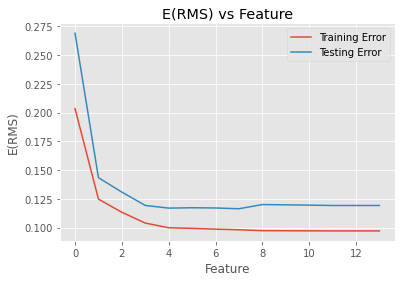

In [25]:
# Function to plot  
feature = [0,1,2,3,4,5,6,7,8,9,10,11,12,13]
plt.plot(feature, vec1, label ='Training Error')
plt.plot(feature, vec2, label ='Testing Error')

plt.xlabel("Feature")
plt.ylabel("E(RMS)")
  
# Function add a legend  
plt.legend()

plt.title("E(RMS) vs Feature")
  
# function to show the plot
plt.show()

In [26]:
vec3 = np.ones(14)
vec4 = np.ones(14)
count3 = 0
count4 = 0

In [27]:
taken = np.ones(13)
answer = []
l = np.ones(X1.size)
test = np.ones(Xtest1.size)
W_best = np.ones(1)
terms = np.ones(1)

for k in range(13):

    t = l
    l = np.c_[t,mydict[k+1]]
    a = test
    test = np.c_[test,dicttest[k+1]]

train_X_terms, W_gd, cost_history_gd, n_iter = model(l, Y, 0.1, 20000)
vec3[count3] = cost_history_gd[-1]
vec4[count4] = calculate_cost(W_gd, test, Y1)
count3 += 1
count4 += 1

#print(l)
find = l[0, :]

for i in range(13):

    minimum_value = 10000000000
    index = -1
    count = 0

    for j in range(13):

        if(taken[j]!=0):

            count += 1
            temp = l[ :,1]
            l = np.delete(l, 1, 1)
            train_X_terms, W_gd, cost_history_gd, n_iter = model(l, Y, 0.1, 20000)

            if(cost_history_gd[-1] < minimum_value):

                minimum_value = cost_history_gd[-1]
                index = count
                W_best = W_gd
                terms = train_X_terms

            t = l
            l = np.c_[t,temp]

    vec3[count3] = minimum_value
    count3 += 1
    search = l[0][index]
    remove = -1
    for s in range(14):

        if(search == find[s]):

            remove = s
            break

    answer.append(s)
    taken[s-1] = 0    
    l = np.delete(l, index, 1)
    test = np.delete(test,index,1)
    vec4[count4] = calculate_cost(W_best, test, Y1)
    count4 += 1
    #print(l)
    #print(index)
    #print(l.shape)

In [28]:
print(answer)

[3, 6, 4, 1, 13, 12, 5, 2, 8, 11, 10, 7, 9]


In [29]:
print(vec3)
print(vec4)

[0.09713366 0.09713366 0.09713366 0.09719869 0.09728194 0.09793367
 0.09855823 0.0993144  0.09978198 0.1039403  0.11198796 0.11798042
 0.12807549 0.20328645]
[0.11922008 0.22108416 0.24903056 0.18706657 0.11975157 0.12025351
 0.11974238 0.16559185 0.11783173 0.12105383 0.13195968 0.13626233
 0.15248833 0.26886215]


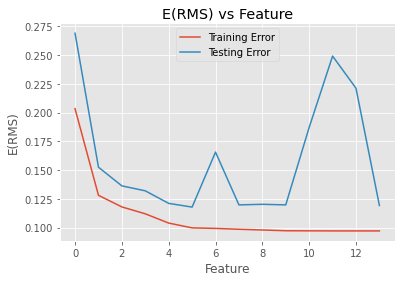

In [30]:
# Function to plot  
feature = [13,12,11,10,9,8,7,6,5,4,3,2,1,0]
plt.plot(feature, vec3, label ='Training Error')
plt.plot(feature, vec4, label ='Testing Error')

plt.xlabel("Feature")
plt.ylabel("E(RMS)")
  
# Function add a legend  
plt.legend()

plt.title("E(RMS) vs Feature")
  
# function to show the plot
plt.show()